## Load

In [219]:
# Libraries
import random
import textwrap
import pickle 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('max_colwidth', 300)
pd.set_option('max_columns', 100)

#### Sections

1. Model, library, dataset loading section
1. Introduction
1. Detailed pipeline diagram
1. Choose and display sample article
1. Explain and explore base features (correlation, distribution)
1. Explain and explore headline features
    1. Syntactic
    1. Semantic
    1. Wikipedia page views of people
1. Combined feature vector
1. Train models mentioned in original paper
1. Get best model and perform grid search
1. Train final model
1. Summarize performance (accuracy, precision, recall, roc, roc curve plot) and compare with original authors
1. Check random predictions

## Sample articles

In [68]:
dataset_path = '../Datasets/OnlineNewsPopularity-Mashable/final_dataset.csv'

In [69]:
df = pd.read_csv(dataset_path)

In [75]:
def print_article(mash_article_content):
    i = random.randint(0, len(mash_article_content))
    headline = mash_article_content.iloc[i, :]['title']
    text = mash_article_content.iloc[i, :]['text']
    shares = mash_article_content.iloc[i, :]['shares']
    display_text = '\n\n'
    display_text += headline.title()
    display_text += '\n'
    display_text += '_' * 70
    display_text += '\n\n'
    display_text += '\n'.join(textwrap.wrap(text))[:1000]
    display_text += '\n\nShares: {}'.format(shares)
    print(display_text)

In [76]:
print_article(df)



Apple Reportedly Developing Curved Iphone Screens
______________________________________________________________________

Apple is developing iPhones with curved-glass screens and enhanced
sensors that detect different levels of pressure, according to a new
report. Two models — with screens of 4.7 inches and 5.5 inches —are in
the works, and both would use glass that curves downward at the edges,
Bloomberg reported, citing an anonymous source familiar with the
plans. These screen sizes almost rival that of Samsung's Galaxy Note
3, which boasts a 5.7-inch screen. For its part, Apple's iPhone 5S has
a 4-inch screen. See also: Rumor: Apple Planning 5.7-Inch iPhone for
2014 The new phones would likely be released in the third quarter of
next year, the source said, adding that Apple is also testing
"pressure-sensitive technology," which won't be ready for the next
iPhone launch.  Curved glass has become a smartphone trend among major
tech companies. Samsung released its Galaxy Round phone

## Base features

In [139]:
base_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

                             Base features

```
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)
```

## Feature exploration

### Feature correlation with target labels

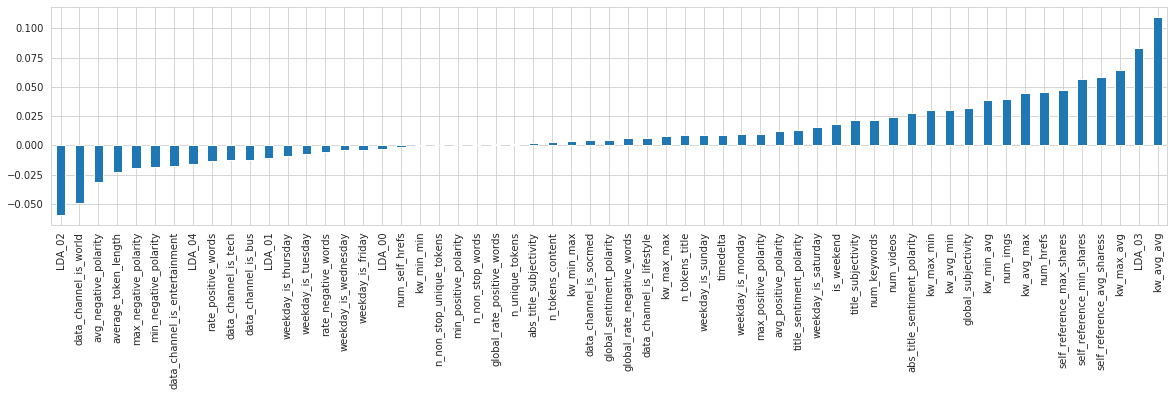

In [105]:
corr = df[base_features].corr()
share_corr = corr.loc['shares'].sort_values(ascending=True).drop('shares')

fig, ax = plt.subplots(figsize=(20, 4))
share_corr.plot(ax=ax, kind='bar')

### Day of week variation

In [ ]:
df.pivot_table()

In [110]:
dow_cols = ['weekday_is_sunday',
            'weekday_is_monday',
            'weekday_is_tuesday',
            'weekday_is_wednesday',
            'weekday_is_thursday',
            'weekday_is_friday',
            'weekday_is_saturday',]

dow = (
    df
    [dow_cols + ['shares']]
    .assign(popular = lambda x: x['shares'] > 1400)
)

dow = pd.wide_to_long(df, stubnames='weekday_is')

dow.head()

TypeError: wide_to_long() missing 2 required positional arguments: 'i' and 'j'

In [111]:
dow.head()

,weekday_is_sunday,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,shares,popular
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,593,False
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,711,False
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1500,True
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1200,False
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,505,False


## Training

In [131]:
# Label is positive if shares > 1400
df['popular'] = df['shares'] > 1400

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score

In [195]:
# Base features
base_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']


# Headline features
syntactic_features = ['total_tokens', 'avg_token_len', 'title_case_tokens', 
                      'upper_case_tokens', 'exclamation_token', 'question_mark_token', 
                      'quote_mark_token']
semantic_features = ['three_consec_nouns', 'noun_percentage', 'proper_noun_percentage', 
                     'verb_percentage' ,'adverb_percentage', 'adjective_percentage', 
                     'interjection', 'non_stop_percentage']
wiki_features = ['wiki_score']

# Final features
final_features = base_features + syntactic_features + semantic_features + wiki_features
label = 'popular'

In [176]:
X = df[final_features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [198]:
# Initialize classifiers
clf_LR = LogisticRegression(random_state=42)
parameters_LR = {
    "penalty": ['l1','l2'],
    "C": [0.1, 0.5, 1., 2., 2.5, 5]
}

clf_RF = RandomForestClassifier(random_state=42)
parameters_RF = {
    "n_estimators": [10, 20, 50, 100, 250],
    'max_depth': [2, 4, 6, 8, 10]
}

clf_AD = AdaBoostClassifier(random_state=42)
parameters_ADA = {
    "n_estimators": [50, 100,200,300],
    "learning_rate": [0.1, 0.5, 1]
}

classifiers = [clf_LR, clf_RF, clf_AD]
parameters = [parameters_LR, parameters_RF, parameters_ADA]

In [200]:
def fit_predict_evaluate(gs_clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    gs_clf.fit(X_train, y_train)
    
    pred_train = gs_clf.predict(X_train)
    pred_test = gs_clf.predict(X_test)
    pred_train_prob = gs_clf.predict_proba(X_train)
    pred_test_prob = gs_clf.predict_proba(X_test)
    
    accuracy_test = accuracy_score(y_test, pred_test)
    accuracy_train = accuracy_score(y_train, pred_train)
    f1 = f1_score(y_test, pred_test)
    auroc = roc_auc_score(y_test, pred_test_prob[:, 1])
    res = {'train_accuracy': accuracy_train, 'test_accuracy': accuracy_test, 'f1': f1, 'auroc': auroc}
    return gs_clf.best_estimator_, res

In [214]:
trained_classifiers = {}
results = {}

In [215]:
for clf, params in zip(classifiers, parameters):
    gs_clf = GridSearchCV(clf, params, n_jobs=-1, verbose=5, cv=5)
    clf_LR, res = fit_predict_evaluate(gs_clf)
    trained_classifiers[clf_LR.__class__.__name__] = clf_LR
    results[clf_LR.__class__.__name__] = res

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  3.0min remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.1min finished
/home/sanjyot/miniconda3/envs/prnn/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.9min finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  9.7min remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.2min finished


## Results

In [216]:
trained_classifiers

{'LogisticRegression': LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=42, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                    n_estim

In [220]:
with open('../Models/best_models.pkl', 'wb') as f:
    pickle.dump(trained_classifiers, f)

In [221]:
results_df = pd.DataFrame(results)
results_df

,LogisticRegression,RandomForestClassifier,AdaBoostClassifier
train_accuracy,0.652470,0.776266,0.675988
test_accuracy,0.649801,0.664766,0.663341
f1,0.637666,0.662291,0.658262
auroc,0.701662,0.721576,0.721497


In [222]:
results_df.to_csv('classifier_results.csv', index=False)